In [1]:
import os
import pandas as pd
import fastparquet

In [2]:
# Configurar pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Si también deseas mostrar todas las columnas, puedes usar:
pd.set_option('display.max_columns', None)

In [3]:
PROJECT_NAME = '.'

try:
    from google.colab import drive
    ROOT = '/content/drive/'
    drive.mount(ROOT, force_remount=True)
    IN_COLAB = True
    BASE_FOLDER = ROOT + 'MyDrive/' + PROJECT_NAME
    DATASET_FOLDER = BASE_FOLDER

except:
    ROOT = '/kaggle'
    IN_COLAB = False
    BASE_FOLDER = os.path.join("/kaggle/working", PROJECT_NAME)
    DATASET_FOLDER = os.path.join("/kaggle/input", PROJECT_NAME)


In [4]:
# Variables Globales
USE_ALL_DATASET = False
NUMBER_ELEMENT = 1000

path_dataset = os.path.join(PROJECT_NAME, "dataset/drugs_data.parquet")
path_dataset

'./dataset/drugs_data.parquet'

In [5]:
df_drugs = pd.read_parquet(path_dataset)

In [6]:
# Visualización de las primeras filas:
display(df_drugs.head(3))

,abuse,active_ingredient,adverse_reactions,alarms,ask_doctor_or_pharmacist,ask_doctor_table,brand_name,carcinogenesis_and_mutagenesis_and_impairment_of_fertility,clinical_pharmacology_table,clinical_studies_table,components_table,contraindications,controlled_substance,dependence,description,do_not_use_table,dosage_and_administration,drug_abuse_and_dependence,drug_and_or_laboratory_test_interactions_table,drug_interactions_table,effective_time,general_precautions,generic_name,geriatric_use,how_supplied_table,id,inactive_ingredient,indications_and_usage,information_for_patients_table,instructions_for_use,labor_and_delivery,laboratory_tests,last_updated,manufacturer_name,mechanism_of_action_table,microbiology_table,nonteratogenic_effects,nursing_mothers,overdosage,package_label_principal_display_panel,patient_medication_information,pediatric_use_table,pharmacodynamics_table,pharmacogenomics_table,pharmacokinetics_table,precautions,pregnancy,pregnancy_or_breast_feeding,product_type,purpose_table,questions_table,recent_major_changes,risks,spl_medguide,spl_patient_package_insert,statement_of_identity,stop_use_table,storage_and_handling,substance_name,summary_of_safety_and_effectiveness,teratogenic_effects,use_in_specific_populations,user_safety_warnings,warnings,warnings_and_cautions_table,when_using
0,,Drug Facts Active ingredient Ethyl Alcohol 61%,,,,,,,,,,,,,DOVE NOURISHING HAND SANITIZER LAVENDER & CHAM...,,Directions • Wet hands thoroughly with product...,,,,20220429,,,,,ddcb15c2-4b75-55e3-e053-2995a90a2142,"Inactive ingredients Water (Aqua), Glycerin, G...",Uses • Hand sanitizer to help reduce bacteria ...,,,,,2024-10-26,,,,,,,Packaging Dove Hand Sanitizer Lavender,,,,,,,,,,,,,,,,,,,,,,,,Warnings For external use only Flammable. Keep...,,
1,,"Active ingredient (in each 5 mL) Ibuprofen, US...",,,Ask a doctor or pharmacist before use if your ...,,,,,,,,,,,,Directions this product does not contain direc...,,,,20240612,,,,,fb799360-8778-47fe-acb1-1805e8070a3b,"Inactive ingredients acesulfame potassium, art...",Uses temporarily relieves minor aches and pain...,,,,,2024-10-26,,,,,,,Principal Display Panel Compare to Children's ...,,,,,,,,,,,,,,,,,,Other information each 5 mL contains : sodium ...,,,,,,Warnings Allergy alert : Ibuprofen may cause a...,,When using this product take with food or milk...
2,,Active Ingredients Purpose Titanium Dioxide 7....,,,,,foundcealer multi-tasking foundation Broad Spe...,,,,,,,,,,Directions Shake before use. Apply liberally 1...,,,,20231219,,TITANIUM DIOXIDE AND ZINC OXIDE,,,ff5bd785-d7c5-45ca-9f17-0e2a6f4ab644,"Inactive Ingredients Water/Aqua/Eau, phenyl tr...",Uses Helps prevent sunburn. If used as directe...,,,,,2024-10-26,"Tarte, Inc.",,,,,,PRINCIPAL DISPLAY PANEL - 10 mL Bottle Carton ...,,,,,,,,,HUMAN OTC DRUG,Active IngredientsPurposeTitanium Dioxide 7.47...,,,,,,,,Other information Protect the product in this ...,TITANIUM DIOXIDE ZINC OXIDE,,,,,Warnings For external use only. Stop use and a...,,When using this product keep out of eyes. Rins...


In [7]:
# Información general del dataset:
display(df_drugs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233538 entries, 0 to 233537
Data columns (total 66 columns):
 #   Column                                                      Non-Null Count   Dtype 
---  ------                                                      --------------   ----- 
 0   abuse                                                       233538 non-null  object
 1   active_ingredient                                           233538 non-null  object
 2   adverse_reactions                                           233538 non-null  object
 3   alarms                                                      233538 non-null  object
 4   ask_doctor_or_pharmacist                                    233538 non-null  object
 5   ask_doctor_table                                            233538 non-null  object
 6   brand_name                                                  233538 non-null  object
 7   carcinogenesis_and_mutagenesis_and_impairment_of_fertility  233538 non-null  object

None

In [8]:
# Resumen estadístico de las columnas numéricas:
display(df_drugs.describe())

,abuse,active_ingredient,adverse_reactions,alarms,ask_doctor_or_pharmacist,ask_doctor_table,brand_name,carcinogenesis_and_mutagenesis_and_impairment_of_fertility,clinical_pharmacology_table,clinical_studies_table,components_table,contraindications,controlled_substance,dependence,description,do_not_use_table,dosage_and_administration,drug_abuse_and_dependence,drug_and_or_laboratory_test_interactions_table,drug_interactions_table,effective_time,general_precautions,generic_name,geriatric_use,how_supplied_table,id,inactive_ingredient,indications_and_usage,information_for_patients_table,instructions_for_use,labor_and_delivery,laboratory_tests,last_updated,manufacturer_name,mechanism_of_action_table,microbiology_table,nonteratogenic_effects,nursing_mothers,overdosage,package_label_principal_display_panel,patient_medication_information,pediatric_use_table,pharmacodynamics_table,pharmacogenomics_table,pharmacokinetics_table,precautions,pregnancy,pregnancy_or_breast_feeding,product_type,purpose_table,questions_table,recent_major_changes,risks,spl_medguide,spl_patient_package_insert,statement_of_identity,stop_use_table,storage_and_handling,substance_name,summary_of_safety_and_effectiveness,teratogenic_effects,use_in_specific_populations,user_safety_warnings,warnings,warnings_and_cautions_table,when_using
count,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538,233538
unique,1537,56923,41159,11,2056,14,39275,13202,15561,16439,3,24484,1112,1466,45151,18,85976,4340,31,5790,5593,7366,14903,13435,10125,233538,67852,76365,659,3001,2872,2500,1,7732,49,872,1015,8877,18146,173972,930,651,1600,4,9414,21283,22447,1849,4,2869,47,6111,476,13419,8151,150,22,23242,8632,14,4639,19768,150,61630,3295,12303
top,,,,,,,,,,,,,,,,,,,,,20190815,,,,,231a15a4-563b-1229-e063-6394a90a088d,,,,,,,2024-10-26,,,,,,,label,,,,,,,,,,,,,,,,,,,,,,,,,,
freq,226474,90172,150943,233521,212841,233522,145380,176950,207867,207617,233536,152598,226057,226902,147614,233517,11880,216183,233449,222965,696,209256,145380,180924,222225,1,88499,11093,232309,229129,217221,218864,233538,145380,233473,232214,227982,188193,157504,7411,232330,232404,230703,233534,217322,189347,171062,196986,145380,229087,233428,216422,232736,213061,222338,233326,233484,162453,147015,233504,220003,195835,233166,51346,226289,163749


In [9]:
# Contar la cantidad de cadenas vacías en cada columna
cantidad_cadenas_vacias = (df_drugs == "").sum()

# Calcular el porcentaje de cadenas vacías en cada columna
porcentaje_cadenas_vacias = (df_drugs == "").mean() * 100

# Combinar ambos resultados en un DataFrame
resumen_ausentes = pd.DataFrame({
    'Cantidad de Valores Ausentes': cantidad_cadenas_vacias.sort_values(),
    'Porcentaje Valores Ausentes': porcentaje_cadenas_vacias.sort_values()
})

# Aplicar formato de porcentaje a dos decimales en la columna de porcentaje
#resumen_ausentes['Porcentaje Valores Ausentes'] = resumen_ausentes['Porcentaje Valores Ausentes'].map("{:.2f}%".format)

print("Resumen de valores ausentes (cadenas vacías) por columna:")
display(resumen_ausentes)

Resumen de valores ausentes (cadenas vacías) por columna:


,Cantidad de Valores Ausentes,Porcentaje Valores Ausentes
id,0,0.000000
effective_time,0,0.000000
last_updated,0,0.000000
package_label_principal_display_panel,689,0.295027
indications_and_usage,11093,4.749976
dosage_and_administration,11880,5.086967
warnings,51346,21.986144
inactive_ingredient,88499,37.894904
active_ingredient,90172,38.611275
manufacturer_name,145380,62.251111


Matplotlib created a temporary cache directory at /tmp/matplotlib-vc5tvhc5 because the default path (/home/ljama/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


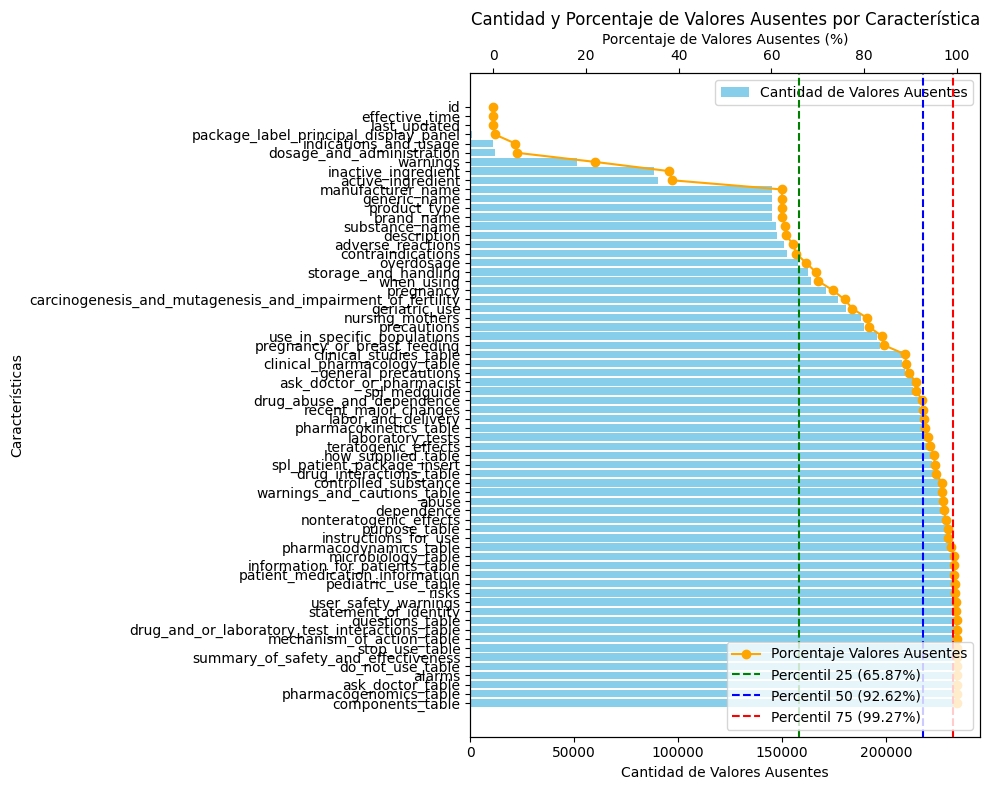

In [10]:
import matplotlib.pyplot as plt

# Calcular los percentiles 25, 50 y 75 del porcentaje de valores ausentes
percentil_25 = resumen_ausentes['Porcentaje Valores Ausentes'].quantile(0.25)
percentil_50 = resumen_ausentes['Porcentaje Valores Ausentes'].quantile(0.50)
percentil_75 = resumen_ausentes['Porcentaje Valores Ausentes'].quantile(0.75)

# Crear la figura y el gráfico
fig, ax1 = plt.subplots(figsize=(10, 8))

# Gráfico de barras para la cantidad de valores ausentes
ax1.barh(resumen_ausentes.index, resumen_ausentes['Cantidad de Valores Ausentes'], color='skyblue', label='Cantidad de Valores Ausentes')
ax1.set_xlabel('Cantidad de Valores Ausentes')
ax1.set_ylabel('Características')
ax1.invert_yaxis()

# Crear un segundo eje y para el porcentaje de valores ausentes
ax2 = ax1.twiny()
ax2.plot(resumen_ausentes['Porcentaje Valores Ausentes'], resumen_ausentes.index, 'o-', color='orange', label='Porcentaje Valores Ausentes')
ax2.set_xlabel('Porcentaje de Valores Ausentes (%)')

# Agregar líneas de percentiles en el gráfico de porcentaje de valores ausentes
ax2.axvline(x=percentil_25, color='green', linestyle='--', label=f'Percentil 25 ({percentil_25:.2f}%)')
ax2.axvline(x=percentil_50, color='blue', linestyle='--', label=f'Percentil 50 ({percentil_50:.2f}%)')
ax2.axvline(x=percentil_75, color='red', linestyle='--', label=f'Percentil 75 ({percentil_75:.2f}%)')

# Agregar leyendas y título
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
plt.title('Cantidad y Porcentaje de Valores Ausentes por Característica')

plt.tight_layout()
plt.show()


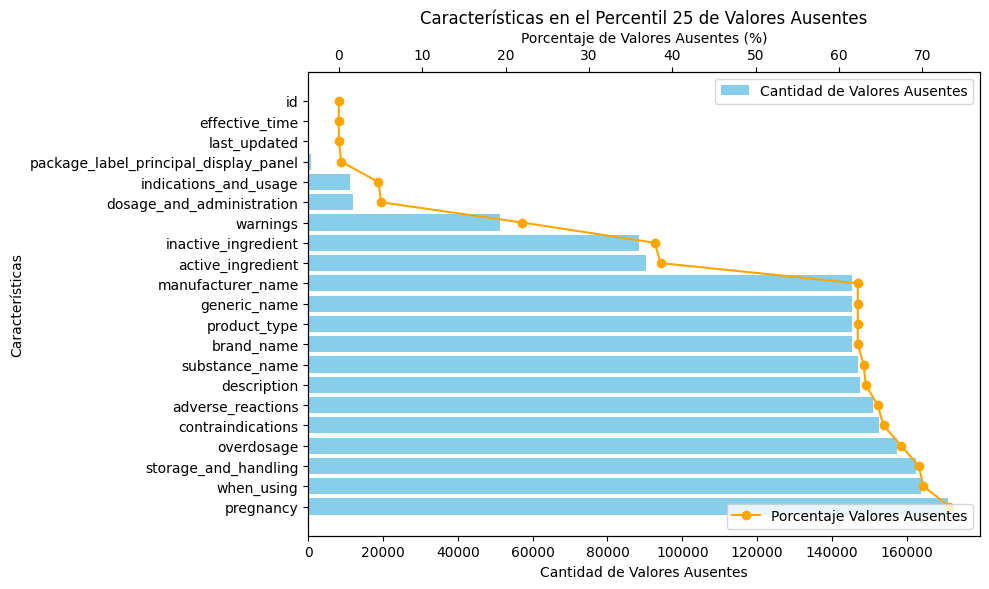

In [11]:
percentil_25 = 75

# Filtrar solo las características que están por debajo o igual al percentil 25
df_percentil_25 = resumen_ausentes[resumen_ausentes['Porcentaje Valores Ausentes'] <= percentil_25]

# Crear la figura y el gráfico para las características en el percentil 25
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para la cantidad de valores ausentes en el percentil 25
ax1.barh(df_percentil_25.index, df_percentil_25['Cantidad de Valores Ausentes'], color='skyblue', label='Cantidad de Valores Ausentes')
ax1.set_xlabel('Cantidad de Valores Ausentes')
ax1.set_ylabel('Características')
ax1.invert_yaxis()  # Invertir el eje y para que las barras más grandes estén arriba

# Crear un segundo eje y para el porcentaje de valores ausentes en el percentil 25
ax2 = ax1.twiny()
ax2.plot(df_percentil_25['Porcentaje Valores Ausentes'], df_percentil_25.index, 'o-', color='orange', label='Porcentaje Valores Ausentes')
ax2.set_xlabel('Porcentaje de Valores Ausentes (%)')

# Agregar leyendas y título
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
plt.title('Características en el Percentil 25 de Valores Ausentes')

plt.tight_layout()
plt.show()


In [15]:
column_detail = df_percentil_25.index.to_list()

# Filtrar solo las columnas en el percentil 25
df_filtrado = df_drugs[column_detail]
df_filtrado.head(3)

,id,effective_time,last_updated,package_label_principal_display_panel,indications_and_usage,dosage_and_administration,warnings,inactive_ingredient,active_ingredient,manufacturer_name,generic_name,product_type,brand_name,substance_name,description,adverse_reactions,contraindications,overdosage,storage_and_handling,when_using,pregnancy
0,ddcb15c2-4b75-55e3-e053-2995a90a2142,20220429,2024-10-26,Packaging Dove Hand Sanitizer Lavender,Uses • Hand sanitizer to help reduce bacteria ...,Directions • Wet hands thoroughly with product...,Warnings For external use only Flammable. Keep...,"Inactive ingredients Water (Aqua), Glycerin, G...",Drug Facts Active ingredient Ethyl Alcohol 61%,,,,,,DOVE NOURISHING HAND SANITIZER LAVENDER & CHAM...,,,,,,
1,fb799360-8778-47fe-acb1-1805e8070a3b,20240612,2024-10-26,Principal Display Panel Compare to Children's ...,Uses temporarily relieves minor aches and pain...,Directions this product does not contain direc...,Warnings Allergy alert : Ibuprofen may cause a...,"Inactive ingredients acesulfame potassium, art...","Active ingredient (in each 5 mL) Ibuprofen, US...",,,,,,,,,,Other information each 5 mL contains : sodium ...,When using this product take with food or milk...,
2,ff5bd785-d7c5-45ca-9f17-0e2a6f4ab644,20231219,2024-10-26,PRINCIPAL DISPLAY PANEL - 10 mL Bottle Carton ...,Uses Helps prevent sunburn. If used as directe...,Directions Shake before use. Apply liberally 1...,Warnings For external use only. Stop use and a...,"Inactive Ingredients Water/Aqua/Eau, phenyl tr...",Active Ingredients Purpose Titanium Dioxide 7....,"Tarte, Inc.",TITANIUM DIOXIDE AND ZINC OXIDE,HUMAN OTC DRUG,foundcealer multi-tasking foundation Broad Spe...,TITANIUM DIOXIDE ZINC OXIDE,,,,,Other information Protect the product in this ...,When using this product keep out of eyes. Rins...,


In [19]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233538 entries, 0 to 233537
Data columns (total 21 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   id                                     233538 non-null  object
 1   effective_time                         233538 non-null  object
 2   last_updated                           233538 non-null  object
 3   package_label_principal_display_panel  233538 non-null  object
 4   indications_and_usage                  233538 non-null  object
 5   dosage_and_administration              233538 non-null  object
 6   warnings                               233538 non-null  object
 7   inactive_ingredient                    233538 non-null  object
 8   active_ingredient                      233538 non-null  object
 9   manufacturer_name                      233538 non-null  object
 10  generic_name                           233538 non-null  object
 11  

In [22]:

mitad = len(df_filtrado) // 2
# Dividir el DataFrame en dos partes
df_parte1 = df_filtrado.iloc[:mitad]
df_parte2 = df_filtrado.iloc[mitad:]

df_parte1.to_csv('resumen_dataset1.csv', index=False)
df_parte2.to_csv('resumen_dataset2.csv', index=False)

In [16]:
# Realizar estadisticas de las columnas y la longitud de los datos

# Crear un diccionario para almacenar las estadísticas de longitud
estadisticas_longitud = {}

# Iterar sobre todas las columnas del DataFrame
for columna in df_percentil_25.index.to_list():
    if df_drugs[columna].dtype == 'object':
        
        # Calcular la longitud de cada entrada en la columna (número de caracteres) usando apply
        # df_drugs[f'longitud_{columna}'] = df_drugs[columna].apply(lambda x: len(str(x)))
        
        # Calcula la longitud de cada entrada en la columna (numero de palabras (tokens) separados por un espacio)
        df_drugs[f'longitud_{columna}'] = df_drugs[columna].astype(str).str.split().str.len()
        
        # Obtener estadísticas descriptivas de la longitud
        stats = df_drugs[f'longitud_{columna}'].describe()
        
        # Almacenar las estadísticas en el diccionario
        estadisticas_longitud[columna] = stats
 
 # Convertir el diccionario de estadísticas en un DataFrame
tabla_estadisticas = pd.DataFrame(estadisticas_longitud).transpose()

In [18]:
# Mostrar la tabla de estadísticas
display(tabla_estadisticas.style.format("{:.2f}"))

,count,mean,std,min,25%,50%,75%,max
id,233538.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
effective_time,233538.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
last_updated,233538.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
package_label_principal_display_panel,233538.00,41.49,87.76,0.00,5.00,15.00,49.00,6041.00
indications_and_usage,233538.00,86.94,162.37,0.00,13.00,27.00,75.00,10879.00
dosage_and_administration,233538.00,241.52,434.55,0.00,27.00,60.00,240.00,8310.00
warnings,233538.00,164.50,387.20,0.00,5.00,47.00,122.00,12747.00
inactive_ingredient,233538.00,18.58,37.94,0.00,0.00,8.00,25.00,5059.00
active_ingredient,233538.00,7.95,17.92,0.00,0.00,5.00,9.00,600.00
manufacturer_name,233538.00,1.24,1.80,0.00,0.00,0.00,3.00,19.00


,count,mean,std,min,25%,50%,75%,max
indications_and_usage,233538.0,86.943367,162.373465,0.0,13.0,27.0,75.0,10879.0
dosage_and_administration,233538.0,241.520164,434.552216,0.0,27.0,60.0,240.0,8310.0
warnings,233538.0,164.502441,387.199277,0.0,5.0,47.0,122.0,12747.0
adverse_reactions,233538.0,271.571235,606.660805,0.0,0.0,0.0,258.0,18060.0
pregnancy,233538.0,86.059087,209.160272,0.0,0.0,0.0,48.0,2572.0


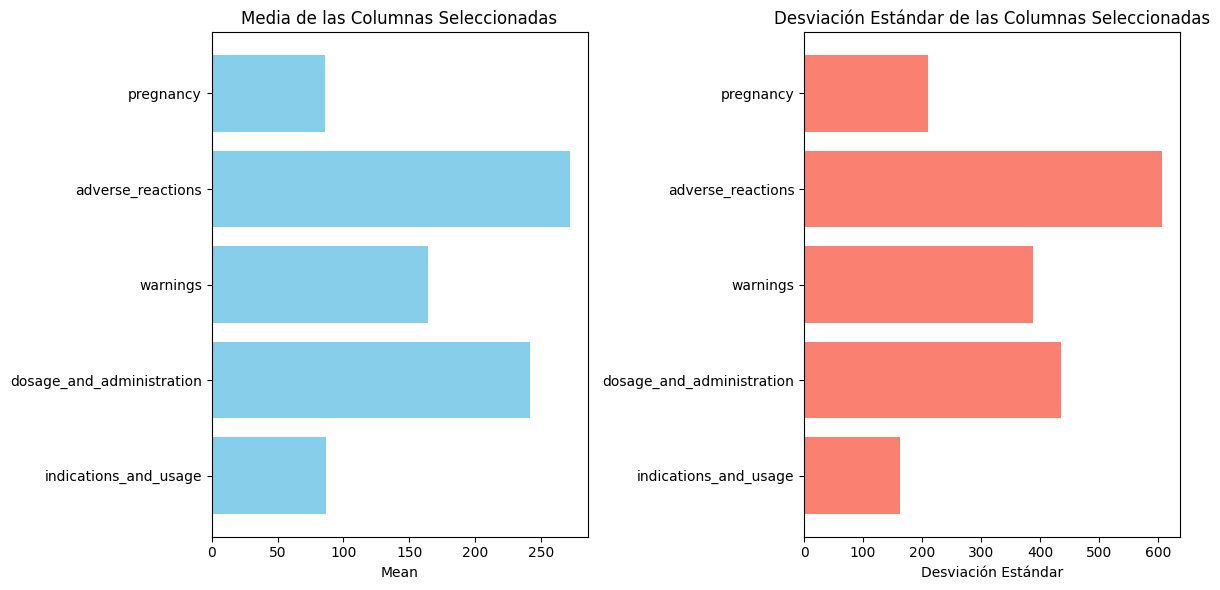

In [19]:
import matplotlib.pyplot as plt

# Renombrar la primera columna para que sea más fácil de manejar en el análisis
#tabla_estadisticas.rename(columns={'Unnamed: 0': 'column_name'}, inplace=True)

# Identificar columnas relevantes para el fine-tuning en función de 'mean' y 'std'
# Aplicar un umbral básico para filtrar columnas con valor medio y desviación estándar altos
threshold_mean = tabla_estadisticas['mean'].quantile(0.75)  # seleccionar columnas en el 25% superior de la media
threshold_std = tabla_estadisticas['std'].quantile(0.75)    # seleccionar columnas en el 25% superior de la desviación estándar

# Filtrar las columnas que cumplen con ambos criterios
relevant_columns = tabla_estadisticas[(tabla_estadisticas['mean'] > threshold_mean) & (tabla_estadisticas['std'] > threshold_std)]

display(relevant_columns)

# Graficar 'mean' y 'std' de las columnas seleccionadas
plt.figure(figsize=(12, 6))

# Gráfico de barras para la media
plt.subplot(1, 2, 1)
plt.barh(relevant_columns.index, relevant_columns['mean'], color='skyblue')
plt.xlabel('Mean')
plt.title('Media de las Columnas Seleccionadas')

# Gráfico de barras para la desviación estándar
plt.subplot(1, 2, 2)
plt.barh(relevant_columns.index, relevant_columns['std'], color='salmon')
plt.xlabel('Desviación Estándar')
plt.title('Desviación Estándar de las Columnas Seleccionadas')

plt.tight_layout()
plt.show()


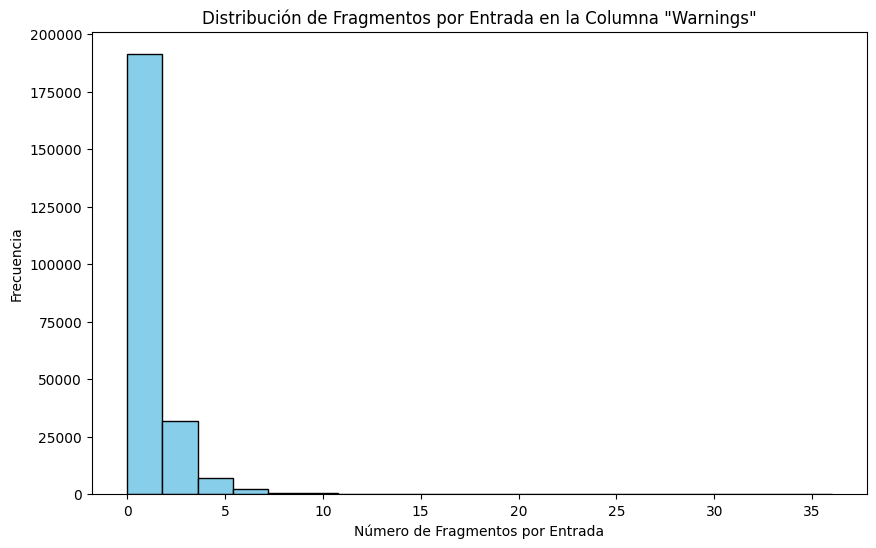

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Definir la función de chunking para dividir en fragmentos de 512 palabras
def chunk_text(text, max_words=512):
    words = text.split()
    chunks = []
    for i in range(0, len(words), max_words):
        chunk = ' '.join(words[i:i + max_words])
        chunks.append(chunk)
    return chunks

# Aplicar chunking y calcular el número de fragmentos para cada entrada en `warnings`
df_drugs['warnings_chunks'] = df_drugs['adverse_reactions'].apply(lambda x: chunk_text(x, max_words=512))
df_drugs['num_chunks'] = df_drugs['warnings_chunks'].apply(len)

# Graficar la distribución del número de fragmentos (chunks) por entrada de `warnings`
plt.figure(figsize=(10, 6))
plt.hist(df_drugs['num_chunks'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Número de Fragmentos por Entrada')
plt.ylabel('Frecuencia')
plt.title('Distribución de Fragmentos por Entrada en la Columna "Warnings"')
plt.show()


In [21]:
tabla_estadisticas.describe()

,count,mean,std,min,25%,50%,75%,max
count,88.0,88.000000,88.000000,88.000000,88.000000,88.00000,88.000000,88.000000
mean,233538.0,23.519229,72.536972,0.034091,0.602273,1.87500,12.238636,3096.727273
std,0.0,53.412532,133.445731,0.182503,3.250251,8.67393,42.416109,4744.215410
min,233538.0,0.000886,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,233538.0,0.035387,2.244807,0.000000,0.000000,0.00000,0.000000,304.750000
50%,233538.0,1.259290,17.400484,0.000000,0.000000,0.00000,0.000000,899.500000
75%,233538.0,18.833777,89.316100,0.000000,0.000000,0.00000,0.000000,4186.250000
max,233538.0,271.571235,632.602494,1.000000,27.000000,60.00000,258.000000,24559.000000
